In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt

# Data location

In [4]:
data_path = "data/clean_data.csv"

# Load data

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.shape

(11627, 40)

In [7]:
df['HDLC']

0        45.0
1        31.0
2        45.0
3        45.0
4        54.0
         ... 
11622    52.0
11623    30.0
11624    52.0
11625    52.0
11626    52.0
Name: HDLC, Length: 11627, dtype: float64

In [8]:
df.columns

Index(['Unnamed: 0', 'RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP',
       'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE',
       'GLUCOSE', 'educ', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP',
       'TIME', 'PERIOD', 'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI',
       'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI',
       'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [9]:
df.iloc[:, 2: 24].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [10]:
df.iloc[:, 24: 32].columns

Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
       'HYPERTEN'],
      dtype='object')

In [11]:
print(df.iloc[:, 2: 24].shape[1], df.iloc[:, 24: 32].shape[1])

22 8


# Node class

In [12]:
class Node():
    def __init__(self, left=None, right=None, information_gain=None,
                 threshold=None, column_index=None, value=None):
        
        #children
        self.left = left  
        self.right = right
        
        #decision node
        self.information_gain = information_gain
        self.threshold = threshold
        self.column_index = column_index
        
        #leef node
        self.value = value

# Tree class

In [13]:
class DecisionTree():
    def __init__(self, min_participant=2, max_depth=2):
        self.root = None
        
        self.min_participant = min_participant
        self.max_depth = max_depth
        
    def split_input_label(self, dataset):
        return dataset[:, :22], dataset[:, 22:]

    def build_tree(self, dataset, depth=0):
        #print(depth)
        count_participant, _ = np.shape(dataset)
        
        if count_participant >= self.min_participant and depth <= self.max_depth:
            split = self.get_split_value(dataset)
            if split['information_gain'] > 0 :
                left = self.build_tree(split['left'], depth=depth + 1)
                right = self.build_tree(split['right'], depth=depth + 1)

                return Node(left, right, split['information_gain'],
                            split['threshold'], split['column_index'])
        
        leaf_value = self.compute_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_split_value(self, dataset):
        max_gain = float('-inf')
        split = {}
        
        inputs, labels = self.split_input_label(dataset)
        columns = inputs.shape[1]

        for i in range(columns):
        
            binary_col = False
            col = dataset[:, i]
            possible_thresholds = np.unique(col)
            
            if len(possible_thresholds) == 2:
                binary_col = True
            else:
                possible_thresholds = possible_thresholds[1:-1]
                
            #print("possible_thre", possible_thresholds)
            
            for threshold in possible_thresholds:
                left, right = self.split(dataset, threshold, i, binary_col)
                gain = self.compute_information_gain(dataset, left, right)
                
                if gain > max_gain:
                    max_gain = gain
                    split['information_gain'] = gain
                    split['threshold'] = threshold
                    split['left'] = left
                    split['right'] = right
                    split['column_index'] = i
                if binary_col:
                    break
        #print("gain", gain, split)
        return split
    
    def split(self, dataset, threshold, column_index, binary_col):
        if binary_col:
            left = dataset[np.where(dataset[:, column_index] == threshold)]
            right = dataset[np.where(dataset[:, column_index] != threshold)]
        else:
            left = dataset[np.where(dataset[:, column_index] <= threshold)]
            right = dataset[np.where(dataset[:, column_index] > threshold)]
        
        return left, right
    
    def compute_information_gain(self, dataset, left, right):
        inputs, labels = self.split_input_label(dataset)
        left_inputs, left_labels = self.split_input_label(left)
        right_inputs, right_labels = self.split_input_label(right)
        #print(left_labels.shape, right_labels.shape)
        
        weight_left = len(left) / len(dataset)
        weight_right = len(right) / len(dataset)
        
        childs_entropy = self.entropy(left_labels) * weight_left + self.entropy(right_labels) * weight_right
        #print("left child entropy", self.entropy(left_labels) * weight_left, "right", self.entropy(right_labels) * weight_right)
        information_gain = self.entropy(labels) - childs_entropy
        
        return information_gain
    
    def entropy(self, labels):
        res = 0
        for value in [0, 1]: #possible values
            value_proportion = len(labels[labels == value]) / len(labels)
            if value_proportion != 0:
                res += -value_proportion * np.log2(value_proportion)
        #print(res)
        return res
    
    def compute_leaf_value(self, label):
        values, counts = np.unique(label, return_counts=True)
        index = np.argmax(counts)
        return values[index]
        
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def evaluate(self, x, decision_tree):
        #leaf
        if decision_tree.value != None:
            return decision_tree.value

        x_column_value = x[decision_tree.column_index]

        if x_column_value <= decision_tree.threshold:
            return self.evaluate(x, decision_tree.left)
        return self.evaluate(x, decision_tree.right)
    
    def predict(self, X):
        return [self.evaluate(x, self.root) for x in X]
    
    def predict_one_element(self, X):
        return [self.evaluate(x, self.root)]
    
    def pretty_print(self, information_gain=True):
        if self.root == None:
            print("No tree, please use the fit method")
            return
        self.pretty_print_node(self.root)
        
    def pretty_print_node(self, node, information_gain=True, tiret="==="):
        if node.value != None:
            print(tiret, "value", node.value)
            return
        
        if information_gain:
            print(tiret, node.information_gain, end=' ')
        
        print(tiret, "colindex ", node.column_index, "thres", node.threshold)
        self.pretty_print_node(node.left, tiret=tiret+"===")
        self.pretty_print_node(node.right, tiret=tiret+"===")

# Split data set into train, validation and test

In [14]:
data = np.loadtxt(data_path, delimiter=",",dtype=float, skiprows=1)
X = data[:, 2:24]
Y = data[:, 29:30]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


# Depth

In [15]:
DEPTH = 10

# DEATH

## * Train

In [16]:
Y = data[:, 24:25]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [17]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [18]:
decision_tree.pretty_print()

=== 0.05702070387115454 === colindex  2 thres 55.0
====== 0.01608023849142104 ====== colindex  0 thres 0.0
========= 0.012821510250028534 ========= colindex  3 thres 136.0
============ 0.010341677761251056 ============ colindex  6 thres 13.0
=============== 0.008599969385589767 =============== colindex  18 thres 1946.0
================== 0.017226403213169594 ================== colindex  2 thres 46.0
===================== 0.01458532606615548 ===================== colindex  3 thres 129.0
======================== 0.0205016012937011 ======================== colindex  4 thres 80.0
=========================== 0.03206354501103725 =========================== colindex  7 thres 23.78
============================== 0.047508572861556214 ============================== colindex  7 thres 19.12
================================= 0.26215496473804495 ================================= colindex  10 thres 77.0
==================================== value 0.0
==================================== value 0.0
====

================================= 0.2128966266607143 ================================= colindex  4 thres 97.0
==================================== value 0.0
==================================== value 0.0
============================== value 0.0
=========================== 0.2820300684982161 =========================== colindex  20 thres 42.0
============================== value 0.0
============================== 0.3033074086078339 ============================== colindex  7 thres 28.38
================================= 0.5503407095463881 ================================= colindex  3 thres 176.0
==================================== value 0.0
==================================== value 0.0
================================= value 0.0
======================== 0.1670071140173105 ======================== colindex  1 thres 224.0
=========================== value 0.0
=========================== 0.2882737050004891 =========================== colindex  18 thres 3993.0
=============================

## * Test

In [19]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.6858740055901956

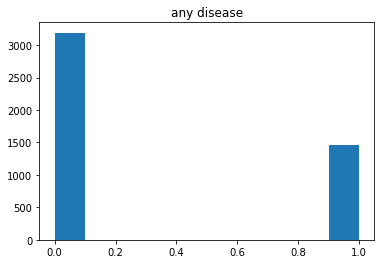

In [20]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

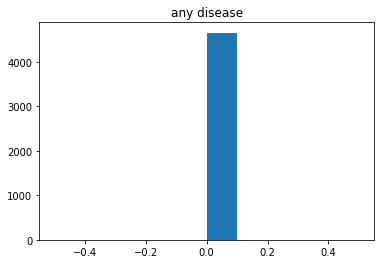

In [21]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# ANGINA

## * Train

In [22]:
Y = data[:, 25:26]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [23]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [24]:
decision_tree.pretty_print()

=== 0.1530510474304339 === colindex  14 thres 0.0
====== 0.005922574385805346 ====== colindex  7 thres 25.07
========= 0.004003559190060735 ========= colindex  1 thres 192.0
============ 0.02555400860759524 ============ colindex  4 thres 105.0
=============== 0.01326696538141886 =============== colindex  5 thres 0.0
================== 0.03356964208198687 ================== colindex  9 thres 0.0
===================== 0.02574972846852802 ===================== colindex  21 thres 229.0
======================== 0.025036519155296144 ======================== colindex  3 thres 166.0
=========================== 0.031096435660648902 =========================== colindex  2 thres 46.0
============================== 0.06879457587256915 ============================== colindex  21 thres 167.0
================================= 0.0988689797057864 ================================= colindex  21 thres 159.0
==================================== value 0.0
==================================== value 0.0
=====

## * Test

In [25]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.8355192431735111

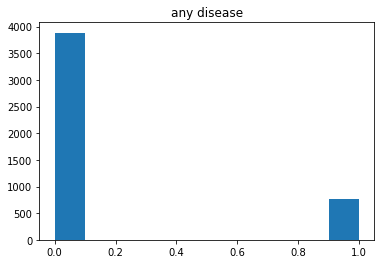

In [26]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

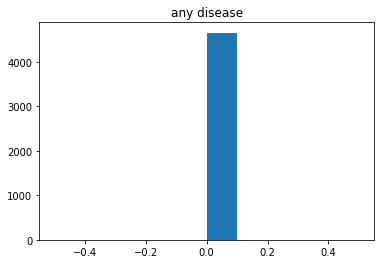

In [27]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# HOSPMI

## * Train

In [28]:
Y = data[:, 26:27]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [29]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [30]:
decision_tree.pretty_print()

=== 0.04878780158734619 === colindex  15 thres 0.0
====== 0.013471865795787907 ====== colindex  0 thres 0.0
========= 0.015591725881404006 ========= colindex  3 thres 143.0
============ 0.007962225877894774 ============ colindex  1 thres 237.0
=============== 0.004738035176243688 =============== colindex  2 thres 54.0
================== 0.007916819321059587 ================== colindex  6 thres 14.0
===================== value 0.0
===================== 0.023624627954446753 ===================== colindex  21 thres 178.0
======================== value 0.0
======================== 0.050737822784508946 ======================== colindex  10 thres 79.0
=========================== value 0.0
=========================== 0.06466782563688872 =========================== colindex  1 thres 202.0
============================== value 0.0
============================== 0.1083487921818046 ============================== colindex  10 thres 105.0
================================= 0.08750861608428073 =======

## * Test

In [31]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.9004515158030532

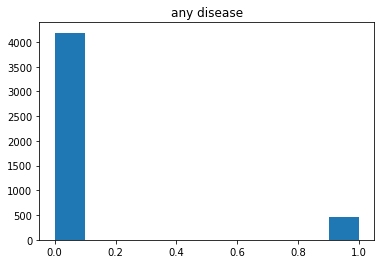

In [32]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

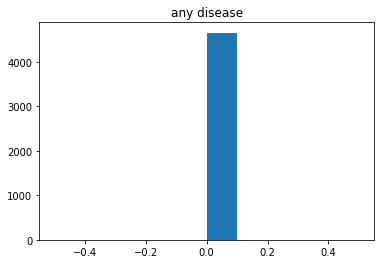

In [33]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# MI_FCHD

## * Train

In [34]:
Y = data[:, 27:28]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [35]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [36]:
decision_tree.pretty_print()

=== 0.051843125481881414 === colindex  13 thres 0.0
====== 0.01813554580368615 ====== colindex  0 thres 0.0
========= 0.0196825456827619 ========= colindex  3 thres 143.0
============ 0.011307408807329222 ============ colindex  1 thres 253.0
=============== 0.009279195778169325 =============== colindex  11 thres 84.0
================== 0.006917147173628832 ================== colindex  12 thres 2.0
===================== 0.008184470739287672 ===================== colindex  2 thres 72.0
======================== 0.007608256755522208 ======================== colindex  20 thres 32.0
=========================== 0.46691718668869925 =========================== colindex  5 thres 0.0
============================== value 0.0
============================== 0.9182958340544896 ============================== colindex  1 thres 209.0
================================= value 0.0
================================= value 0.0
=========================== 0.0073556464622920315 =========================== colind

==================================== value 0.0
==================================== value 0.0
============================== value 0.0
===================== value 0.0
================== 0.09378433834008804 ================== colindex  7 thres 19.51
===================== value 0.0
===================== 0.10947031831261267 ===================== colindex  11 thres 71.0
======================== value 0.0
======================== 0.09903111779641127 ======================== colindex  2 thres 71.0
=========================== 0.12191373031411523 =========================== colindex  11 thres 130.0
============================== 0.13056213310205142 ============================== colindex  4 thres 72.0
================================= 0.46691718668869925 ================================= colindex  3 thres 128.0
==================================== value 0.0
==================================== value 0.0
================================= value 0.0
============================== 0.91829583405448

## * Test

In [37]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.8398193936787788

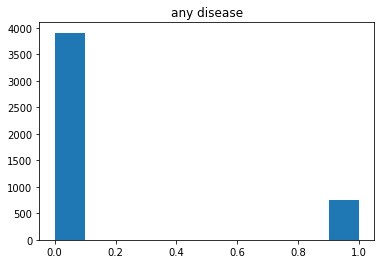

In [38]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

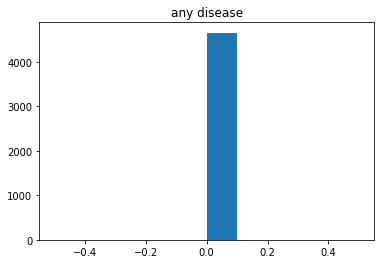

In [39]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# ANY_CHD

## * Train

In [40]:
Y = data[:, 28:29]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [41]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [42]:
decision_tree.pretty_print()

=== 0.1434397044030703 === colindex  13 thres 0.0
====== 0.015215921525678189 ====== colindex  0 thres 0.0
========= 0.02104346198513707 ========= colindex  3 thres 143.0
============ 0.009608538069737604 ============ colindex  1 thres 226.0
=============== 0.008187981327774763 =============== colindex  12 thres 2.0
================== 0.009018169149571709 ================== colindex  12 thres 1.0
===================== 0.019628907675779628 ===================== colindex  20 thres 46.0
======================== 0.03856556006837619 ======================== colindex  6 thres 3.0
=========================== 0.08418785443357679 =========================== colindex  4 thres 63.0
============================== 0.5216406363433185 ============================== colindex  10 thres 75.0
================================= 0.8112781244591328 ================================= colindex  3 thres 108.0
==================================== value 0.0
==================================== value 0.0
==========

## * Test

In [43]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.725220382713395

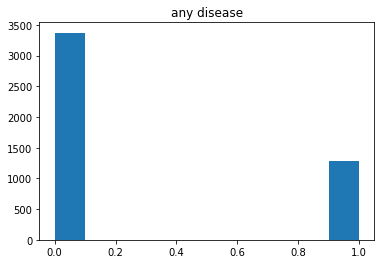

In [44]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

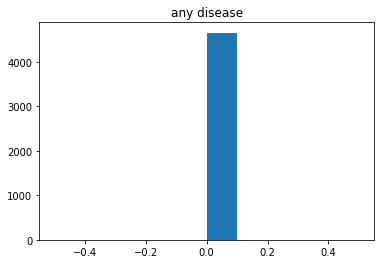

In [45]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# STROKE

## * Train

In [46]:
Y = data[:, 29:30]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [47]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [48]:
decision_tree.pretty_print()

=== 0.04897906671944641 === colindex  16 thres 0.0
====== 0.021618781716181534 ====== colindex  2 thres 55.0
========= 0.0060533120289017195 ========= colindex  3 thres 136.0
============ 0.004487335965693423 ============ colindex  6 thres 2.0
=============== 0.005394170538013401 =============== colindex  7 thres 26.43
================== 0.006848560901294383 ================== colindex  3 thres 120.0
===================== value 0.0
===================== 0.015330538094050286 ===================== colindex  10 thres 67.0
======================== 0.06602806001833206 ======================== colindex  4 thres 76.0
=========================== 0.4074677714354199 =========================== colindex  1 thres 180.0
============================== value 0.0
============================== 0.4394969869215134 ============================== colindex  7 thres 24.66
================================= value 0.0
================================= value 0.0
=========================== 0.03975368696830124 =

## * Test

In [49]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.9120619221672759

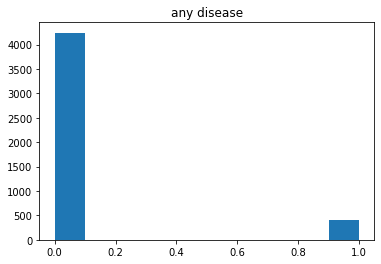

In [50]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

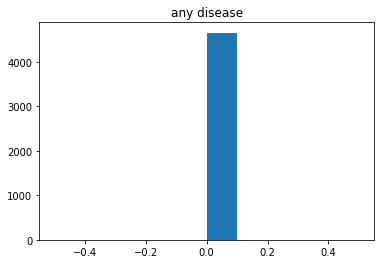

In [51]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# CVD

## * Train

In [52]:
Y = data[:, 30:31]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(6976, 22)


In [53]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [54]:
decision_tree.pretty_print()

=== 0.05474332655752823 === colindex  15 thres 0.0
====== 0.032932433629236924 ====== colindex  3 thres 135.0
========= 0.02643926065113167 ========= colindex  0 thres 0.0
============ 0.01933618166338069 ============ colindex  16 thres 0.0
=============== 0.01026134805095602 =============== colindex  1 thres 279.0
================== 0.009484481007892565 ================== colindex  12 thres 2.0
===================== 0.010208546971188559 ===================== colindex  2 thres 56.0
======================== 0.006809941772295158 ======================== colindex  11 thres 80.0
=========================== 0.011592918673945352 =========================== colindex  3 thres 105.0
============================== value 0.0
============================== 0.009234492663478866 ============================== colindex  7 thres 22.5
================================= 0.026392593396664568 ================================= colindex  1 thres 225.0
==================================== value 0.0
==========

## * Test

In [55]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

0.7490862180176306

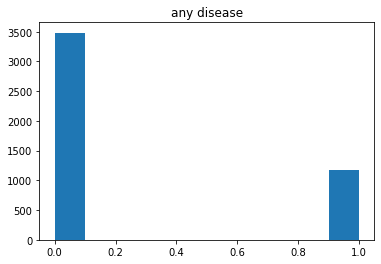

In [56]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

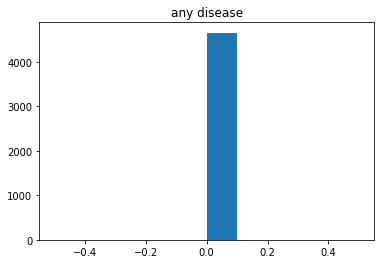

In [57]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()

# HYPERTEN

## * Train

In [58]:
Y = data[:, 31:32]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y)
print(X_train.shape)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
(6976, 22)


In [59]:
decision_tree = DecisionTree(max_depth=DEPTH)
decision_tree.fit(X_train, Y_train)

In [60]:
decision_tree.pretty_print()

=== 0.2855405938344515 === colindex  17 thres 0.0
====== 0.08505551104492248 ====== colindex  3 thres 121.0
========= 0.028718533881911146 ========= colindex  3 thres 113.0
============ 0.018531711273388485 ============ colindex  18 thres 1914.0
=============== 0.03604585912218372 =============== colindex  7 thres 24.85
================== 0.011649823533331882 ================== colindex  20 thres 69.0
===================== 0.012282281412870466 ===================== colindex  12 thres 3.0
======================== 0.016724984199091963 ======================== colindex  11 thres 80.0
=========================== 0.033491315595832516 =========================== colindex  4 thres 66.0
============================== 0.11271765274279782 ============================== colindex  1 thres 213.0
================================= value 1.0
================================= 0.26899559358928116 ================================= colindex  3 thres 93.0
==================================== value 1.0
====

## * Test

In [61]:
Y_pred = decision_tree.predict(X_test) 

print(Y_pred)
print(Y_test.flatten())
accuracy_score(Y_test.flatten(), Y_pred)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

0.7441410449365727

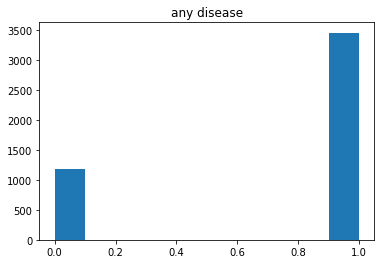

In [62]:
hist,bins = np.histogram(Y_test.flatten()) 

plt.hist(Y_test.flatten(), bins = bins) 
plt.title("any disease") 
plt.show()

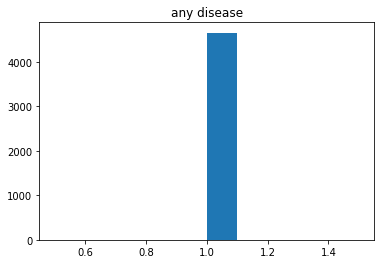

In [63]:
hist,bins = np.histogram(Y_pred) 

plt.hist(Y_pred, bins = bins) 
plt.title("any disease") 
plt.show()